# Importing Libraries

In [135]:
import numpy as np 
# linear algebra
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# for data visualization
import matplotlib.patches as mpatches
import seaborn as sns 
# for data visualization
import warnings
warnings.filterwarnings('ignore')

# Importing data 

In [136]:
df=pd.read_csv('F:/netflix_titles.csv')
#df=pd.read_csv('C:\\Users\\Indu\\Documents\\netflix_titles.csv')

# Studying the Variables

In [137]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


The variables are:-

1-show_id: unique id of each show

2-type: The category of a show, can be either a Movie or a TV Show

3-title: Name of the show

4-director: Name of the director(s) of the show

5-cast: Name of actors and other cast of the show

6-country: Name of countries the show is available to watch on Netflix

7-date_added: Date when the show was added on Netflix

8-release_year: Release year of the show

9-rating: Show rating on netflix

10-duration: Time duration of the show

11-listed_in: Genre of the show

12-description: Text describing the show

In [138]:
df.shape

(7787, 12)

The dataset has 7787 rows and 12 columns

In [139]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [140]:
#Seperating date, month and year from date_added, the data the particular movie or TV Show was added on Netflix
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [141]:
#Renaming months
df['month_added'] = df['month_added'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

In [142]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,Aug,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Dec,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Dec,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,Nov,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,Jan,


In [143]:
#Looking for missng values
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(df)

,Total,Percent
director,2389,0.306793
cast,718,0.092205
country,507,0.065109
month_added,10,0.001284
year_added,10,0.001284
date_added,10,0.001284
rating,7,0.000899
season_count,0,0.000000
description,0,0.000000
listed_in,0,0.000000


In [144]:
#dropping rows with missing values in date_added and rating
df.dropna(subset=['date_added', 'rating'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,Aug,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Dec,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Dec,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,Nov,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,Jan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,Oct,
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,Mar,
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,Sept,
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,Oct,1


In [145]:
#Filling missing places with NaN
df.fillna('NaN', inplace = True)

In [146]:
#No null values in the data
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
season_count    0
dtype: int64

In [147]:
# Counting the content of Netflix
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

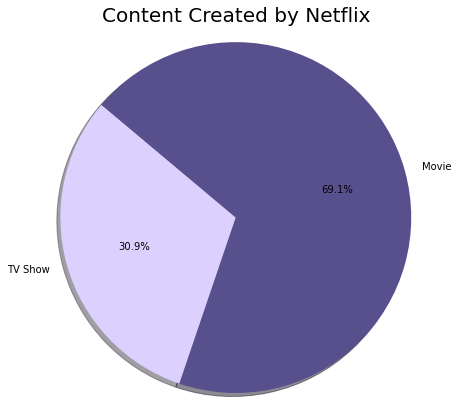

In [148]:
# Displaying the division of Type variable with pie chart
labels = 'TV Show', 'Movie'
sizes = [30.9,69.1]
colors = ['#DCD0FF','#58508d' ]
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Content Created by Netflix", fontsize = 20)
plt.show()

Apporoximately 31% of the content in Netflix is TV Shows and 69% is movies

# Release year and Added Year

In [149]:
#Diving data into movies and TV shows
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

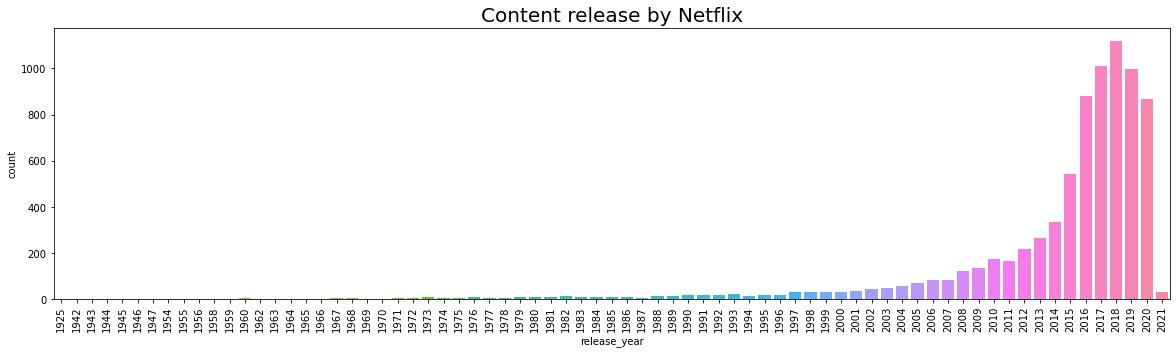

In [150]:
#counting the content release in different years
plt.figure(figsize = (20,5))
sns.countplot(df['release_year'], saturation=1)
plt.xticks(rotation=90)
plt.title('Content release by Netflix', fontsize=20)
plt.show()

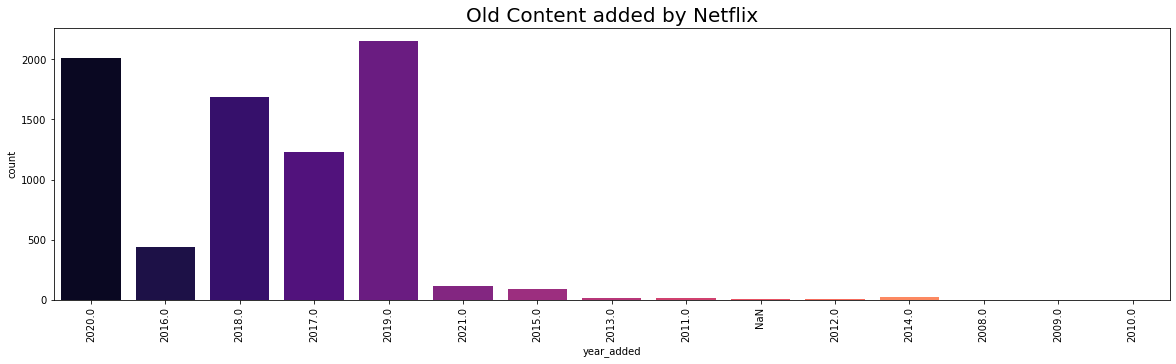

In [151]:
plt.figure(figsize = (20,5))
sns.countplot(df['year_added'], saturation=1,palette="magma")
plt.title("Old Content added by Netflix", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In the last few years the content of Netflix excellerated. Netflix was at its peak in 2018

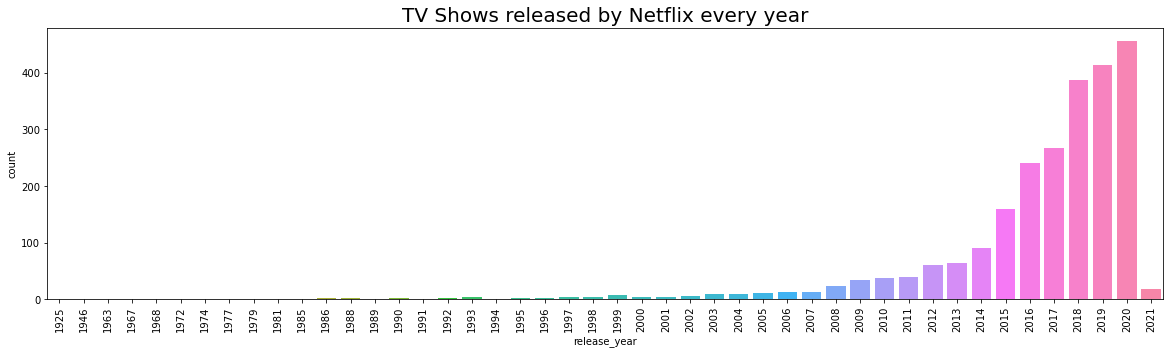

In [152]:
#TV Show release by Netflix
plt.figure(figsize = (20,5))
sns.countplot(df1['release_year'], saturation=1)
plt.xticks(rotation=90)
plt.title("TV Shows released by Netflix every year", fontsize = 20)
plt.show()

More and more TV Shows are being realeased by Netflix every year. 

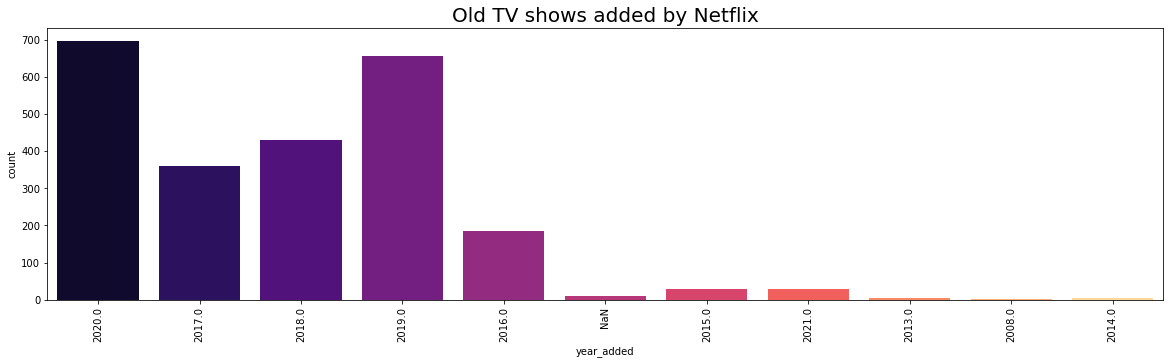

In [153]:
#TV Shows added by Netflix
plt.figure(figsize = (20,5))
sns.countplot(df1['year_added'], saturation=1,palette="magma")
plt.title("Old TV shows added by Netflix", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

Netflix is also increasing the TV Shows it add, every year.

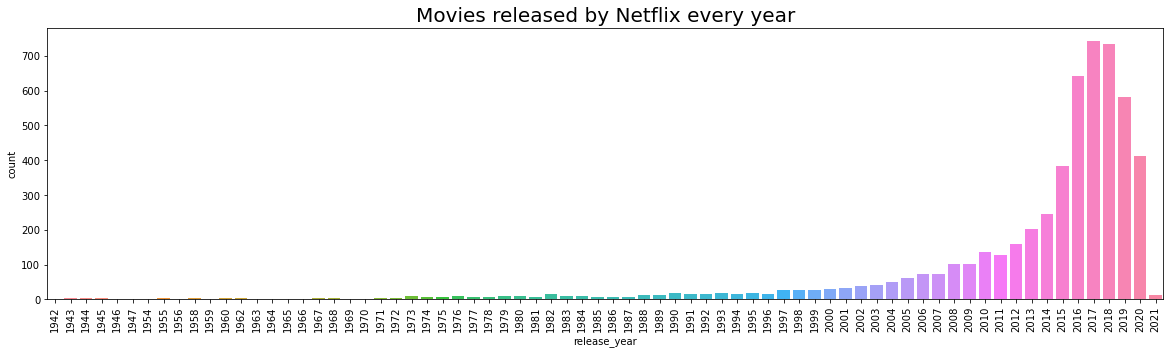

In [154]:
#movies released by Netflix
plt.figure(figsize = (20,5))
sns.countplot(df2['release_year'], saturation=1)
plt.title("Movies released by Netflix every year", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

Movies released by Netflix was at it's peak in 2017, it has been decreasing since.

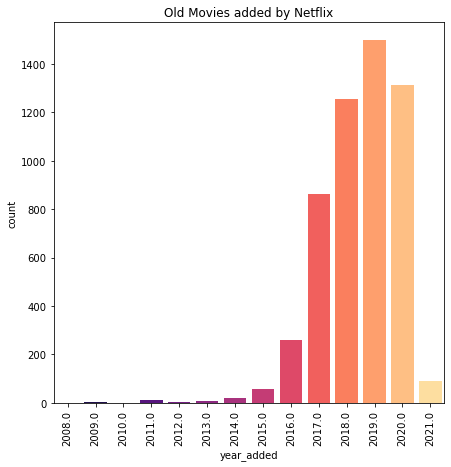

In [155]:
#plt.figure(figsize = (20,5))
sns.countplot(df2['year_added'], saturation=10, palette="magma")
plt.title("Old Movies added by Netflix")
plt.xticks(rotation=90)
plt.show()

Netflix has been adding old movies and it is incresing year by year

The number of TV Shows released by Netflix is increasing and the number of Movies are decreasing.

# Countries 

In [156]:
#Content created in dofferent countries
df['country'].value_counts()

United States                                             2555
India                                                      923
NaN                                                        507
United Kingdom                                             397
Japan                                                      226
                                                          ... 
United Kingdom, Czech Republic, Germany, United States       1
Spain, Portugal                                              1
Czech Republic, United Kingdom, France                       1
Croatia                                                      1
France, Belgium, United States                               1
Name: country, Length: 682, dtype: int64

In [157]:
dfC = df[df.country.isin(['India', 'United States', 'Canada', 'Spain', 'United Kingdom', 'Egypt', 'Turkey', 'Philippines', 'France'])]

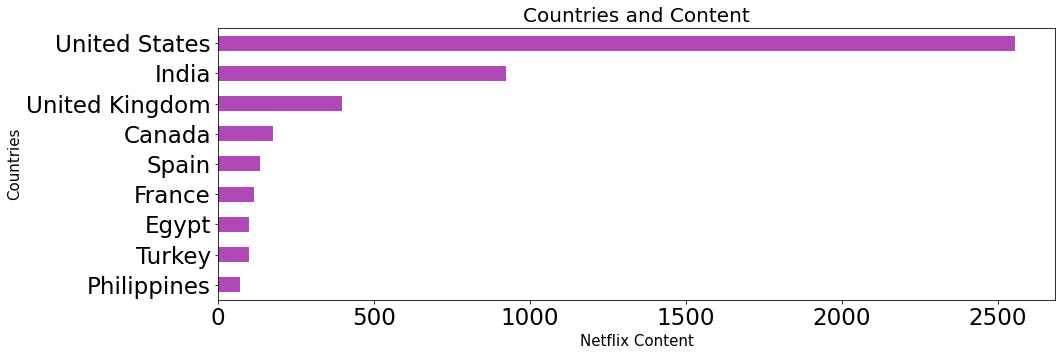

In [158]:
dfC['country'].value_counts().plot.barh(
    figsize=(15, 5),
    color='#B048B5',
    fontsize=23).invert_yaxis()
plt.title('Countries and Content', fontsize=20)
plt.xlabel('Netflix Content', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.show()

In [159]:
#Top countries creating TV series
df1['country'].value_counts()

United States                                                705
NaN                                                          277
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
                                                            ... 
Chile, Italy                                                   1
Japan, Canada                                                  1
Australia, New Zealand                                         1
Spain, Italy                                                   1
Canada, United States, United Kingdom, France, Luxembourg      1
Name: country, Length: 184, dtype: int64

In [160]:
dfC1 = df1[df1.country.isin(['India', 'United States', 'Canada', 'Spain', 'United Kingdom', 'Egypt', 'Turkey', 'Philippines', 'France'])]

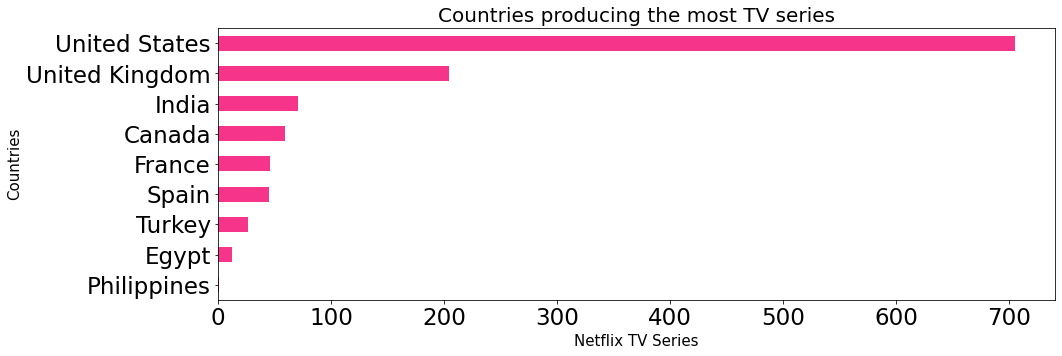

In [161]:
dfC1['country'].value_counts().plot.barh(
    figsize=(15,5),
    color='#F6358A',
    fontsize=23).invert_yaxis()
plt.title('Countries producing the most TV series', fontsize=20)
plt.xlabel('Netflix TV Series', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.show()

United States, Uk, India, Canada and France create the most number of TV Series

In [162]:
#Movies created by different countries
df2['country'].value_counts()

United States                                     1850
India                                              852
NaN                                                230
United Kingdom                                     193
Canada                                             118
                                                  ... 
Spain, Mexico, France                                1
United States, Canada, Germany                       1
United Kingdom, France, Belgium, United States       1
India, United Kingdom                                1
France, Belgium, United States                       1
Name: country, Length: 591, dtype: int64

In [163]:
dfC2 = df2[df2.country.isin(['India', 'United States', 'Canada', 'Spain', 'United Kingdom', 'Egypt', 'Turkey', 'Philippines', 'France'])]

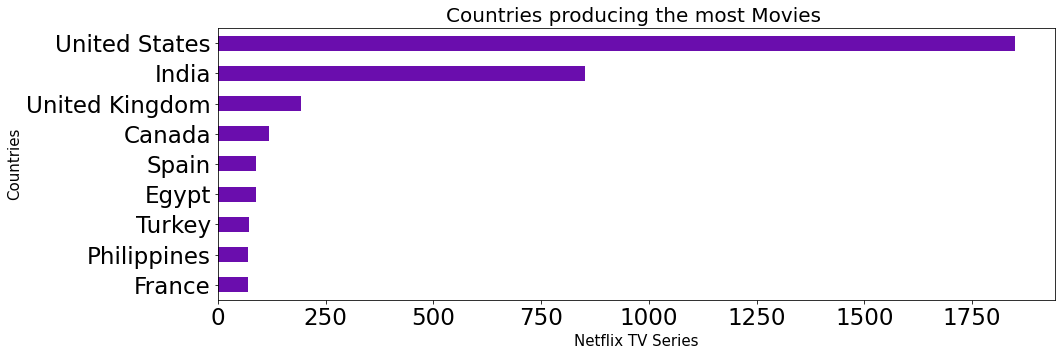

In [164]:
dfC2['country'].value_counts().plot.barh(
    figsize=(15, 5),
    color='#6A0DAD',
    fontsize=23).invert_yaxis()
plt.title('Countries producing the most Movies ', fontsize=20)
plt.xlabel('Netflix TV Series', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.show()

United States, India, United Kingdom, Canada and Spain create the most number of TV Series

# Genre

In [165]:
#Top Genres of Content on Netflix
genre= df['listed_in'].value_counts().head(10)
genre

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64

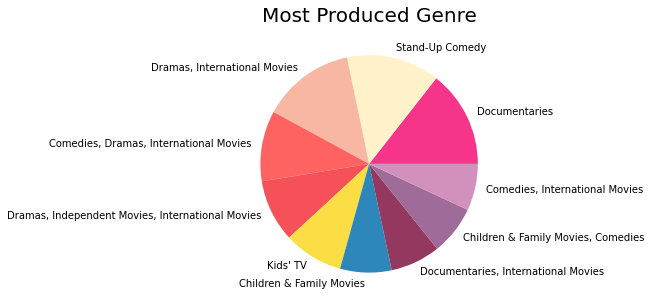

In [166]:
plt.figure(figsize =(5,5))
colors = ['#F6358A', '#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', '#2D87BB', '#93385FFF', '#9F6B99FF',
         '#D291BC'] 
plt.pie(genre, labels = ["Documentaries", "Stand-Up Comedy", 
                         "Dramas, International Movies", "Comedies, Dramas, International Movies",
                         "Dramas, Independent Movies, International Movies","Kids' TV",
                         "Children & Family Movies", "Documentaries, International Movies",
                         "Children & Family Movies, Comedies","Comedies, International Movies"], colors = colors)
plt.title('Most Produced Genre', fontsize=20)                        
plt.show()

Documentaries, StandUp Comedy, Dramas and International Movies are the most produced content in Python

In [167]:
#Genre preference in TV Shows
genre_shows = df1['listed_in'].value_counts().head(10)
genre_shows

Kids' TV                                                      205
International TV Shows, TV Dramas                             111
Crime TV Shows, International TV Shows, TV Dramas             106
Kids' TV, TV Comedies                                          90
International TV Shows, Romantic TV Shows, TV Dramas           86
Reality TV                                                     83
International TV Shows, Romantic TV Shows, TV Comedies         79
Anime Series, International TV Shows                           75
Docuseries                                                     74
International TV Shows, Korean TV Shows, Romantic TV Shows     65
Name: listed_in, dtype: int64

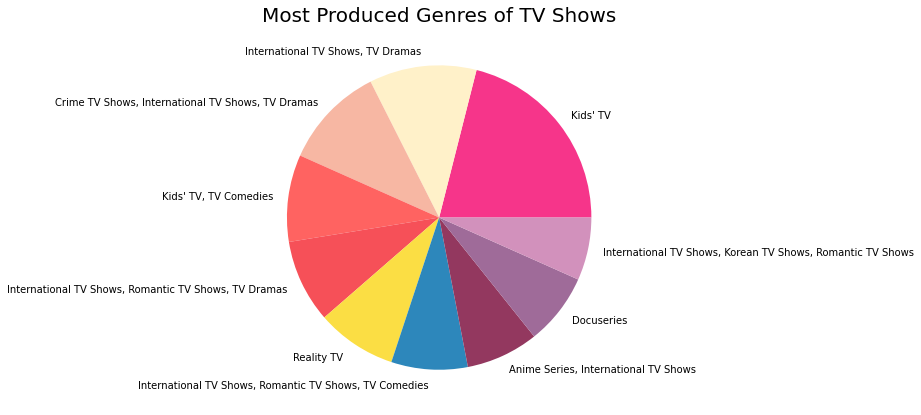

In [168]:
plt.figure(figsize =(10, 7))
colors = ['#F6358A', '#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF', '#9F6B99FF','#D291BC'] 
plt.pie(genre_shows, labels = ["Kids' TV", "International TV Shows, TV Dramas", 
                               "Crime TV Shows, International TV Shows, TV Dramas", 
                               "Kids' TV, TV Comedies", 
                               "International TV Shows, Romantic TV Shows, TV Dramas", 
                               "Reality TV ", "International TV Shows, Romantic TV Shows, TV Comedies", 
                               "Anime Series, International TV Shows", "Docuseries ", 
                               "International TV Shows, Korean TV Shows, Romantic TV Shows"], colors = colors)
plt.title('Most Produced Genres of TV Shows', fontsize=20)
plt.show()

Kids, International Shows, Drama, Crime, Comedy and Romantic are the most produced genre of TV Shows

In [169]:
genre_movies = df2['listed_in'].value_counts().head(10)
genre_movies

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Name: listed_in, dtype: int64

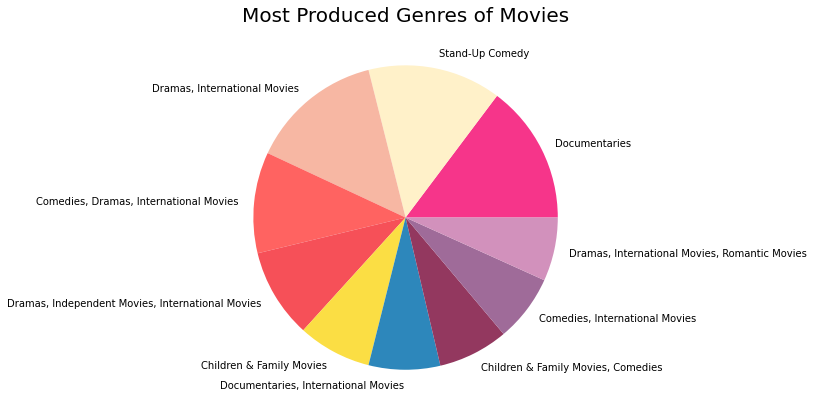

In [170]:
plt.figure(figsize =(10, 7))
colors = ['#F6358A', '#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF', '#9F6B99FF','#D291BC'] 
plt.pie(genre_movies, labels =["Documentaries", "Stand-Up Comedy", "Dramas, International Movies", 
                               "Comedies, Dramas, International Movies",
                               "Dramas, Independent Movies, International Movies",
                               "Children & Family Movies", "Documentaries, International Movies",
                               "Children & Family Movies, Comedies","Comedies, International Movies", 
                               "Dramas, International Movies, Romantic Movies"], colors = colors )
plt.title('Most Produced Genres of Movies', fontsize=20)
plt.show()

# Directors

In [171]:
#Directors with the most content on Netflix
df['director'].value_counts().head(10)

NaN                       2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Jay Chapman                 12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Name: director, dtype: int64

Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina and Jay Chapman directed the most content on Netflix

In [172]:
#Top 10 TV Show director
df1['director'].value_counts().head(10)

NaN                    2226
Alastair Fothergill       3
Shin Won-ho               2
Stan Lathan               2
Rob Seidenglanz           2
Ken Burns                 2
Iginio Straffi            2
Pavel Kostomarov          1
Onur Ünlü                 1
Tsutomu Mizushima         1
Name: director, dtype: int64

Alastair Fothergill directed the most TV shows on Netflix. 

In [173]:
#Top 10 directors of movies on Netflix
df2['director'].value_counts().head(10)

NaN                       163
Raúl Campos, Jan Suter     18
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Martin Scorsese            12
Youssef Chahine            12
Steven Spielberg           10
David Dhawan                9
Name: director, dtype: int64

Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina and Jay Chapman directed the most movies on Netflix

The dataset donot have much information about directors of TV Shows. Each director directed average 1 TV Show

# Rating

In [174]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [175]:
from pywaffle import Waffle

In [176]:
#Rating of content on Netflix
count_rating = df['rating'].value_counts()
count_rating

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
NaN            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

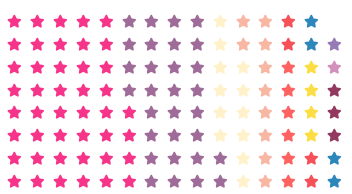

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
NaN            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [177]:
 fig = plt.figure(
    FigureClass=Waffle,
    rows=8, 
    columns=15, 
    values=count_rating,
    colors = ['#F6358A', '#9F6B99FF','#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF', '#D291BC', '#967BB6', '#FAF5EF', '#FDEEF4', '#3EB489','#566D7E'],   
    figsize=(5, 3),
    icons='star')
plt.show()
count_rating

Most content is made for mature audience, for audience above 14 and 17 and with parental Guidance

In [178]:
#rating of TV Series
count_rating1 = df1['rating'].value_counts()
count_rating1

TV-MA       1018
TV-14        659
TV-PG        301
TV-Y7        176
TV-Y         163
TV-G          83
NR             5
R              2
NaN            2
TV-Y7-FV       1
Name: rating, dtype: int64

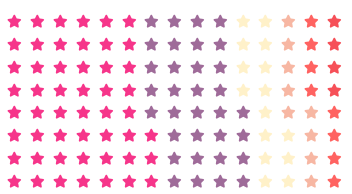

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
NaN            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [179]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=8, 
    columns=15, 
    values=count_rating1,
    colors = ['#F6358A', '#9F6B99FF','#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF','#566D7E'],   
    figsize=(5, 3),
    icons='star')
plt.show()
count_rating

There are only 9 rating types in TV Shows and most are for above 14 and above 17 years of age

In [180]:
#Rating of Movies on Netflix
count_rating2 = df2['rating'].value_counts()
count_rating2

TV-MA       1845
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
NaN            5
UR             5
NC-17          3
Name: rating, dtype: int64

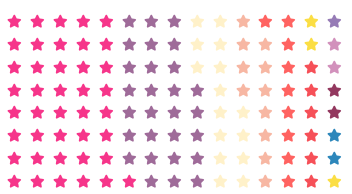

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
NaN            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [214]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=8, 
    columns=15, 
    values=count_rating2,
    colors = ['#F6358A', '#9F6B99FF','#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF',  '#D291BC', '#967BB6', '#FAF5EF', '#FDEEF4', '#3EB489','#CD3333'],   
    figsize=(5, 3),
    icons='star')
plt.show()
count_rating

Most of the content of Netflix is for adults or need parental guidance. Apart from that there is a huge number of teenager Content

# Month in which Movies are added

In [182]:
#Renaming months
df['month_added'] = df['month_added'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

In [183]:
count_month = df['month_added'].value_counts()
count_month

Dec     833
Oct     785
Jan     757
Nov     738
Mar     669
Sept    619
Aug     618
Apr     601
July    600
May     543
June    542
Feb     472
NaN      10
Name: month_added, dtype: int64

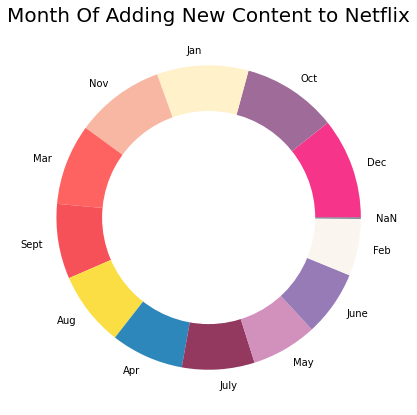

In [184]:
#Defining Colours
colors = ['#F6358A', '#9F6B99FF','#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF', '#D291BC', '#967BB6', '#FAF5EF','#566D7E']
# Pie Chart
plt.pie(count_month, labels = ['Dec', 'Oct', 'Jan', 'Nov', 'Mar', 'Sept', 'Aug', 'Apr', 'July', 'May', 'June','Feb','NaN'], colors = colors)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Month Of Adding New Content to Netflix', fontsize = 20)
  
# Displaing Chart
plt.show()

In [185]:
#Renaming months
df1['month_added'] = df1['month_added'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

In [186]:
Count_shows_month = df1['month_added'].value_counts()
Count_shows_month

Dec     279
Oct     232
Nov     227
Sept    204
Aug     204
Mar     198
Jan     197
July    197
Apr     181
May     172
June    165
Feb     144
NaN      10
Name: month_added, dtype: int64

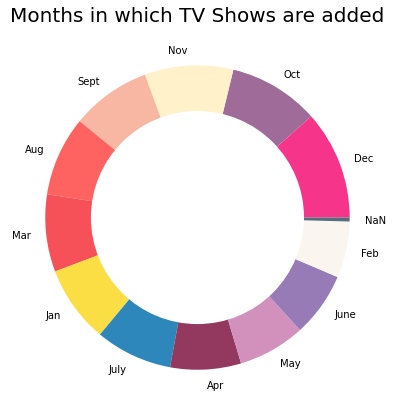

In [187]:
#Defining Colours
colors = ['#F6358A', '#9F6B99FF','#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF', '#D291BC', '#967BB6', '#FAF5EF','#566D7E']
# Pie Chart
plt.pie(Count_shows_month, labels = ['Dec', 'Oct','Nov','Sept', 'Aug','Mar','Jan', 'July',
                                     'Apr', 'May', 'June','Feb','NaN'], colors = colors)

  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Months in which TV Shows are added', fontsize = 20)
  
# Displaing Chart
plt.show()

In [188]:
#Renaming months
df2['month_added'] = df2['month_added'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

In [189]:
Count_movie_month = df2['month_added'].value_counts()
Count_movie_month

Jan     560
Dec     554
Oct     553
Nov     511
Mar     471
Apr     420
Sept    415
Aug     414
July    403
June    377
May     371
Feb     328
Name: month_added, dtype: int64

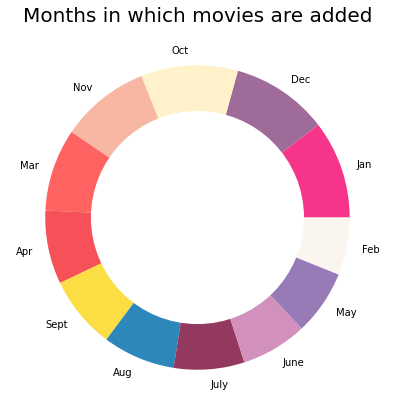

In [190]:
#Defining Colours
colors = ['#F6358A', '#9F6B99FF','#FFF1C9', '#F7B7A3', '#ff6361', '#F65058FF', '#FBDE44FF', 
          '#2D87BB', '#93385FFF', '#D291BC', '#967BB6', '#FAF5EF']
# Pie Chart
plt.pie(Count_movie_month, labels= ['Jan', 'Dec', 'Oct', 'Nov', 'Mar', 'Apr', 'Sept', 'Aug', 
                                    'July', 'June', 'May','Feb'], colors= colors)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Months in which movies are added', fontsize = 20)
  
# Displaing Chart
plt.show()

During the holidays time, in December and January, more movies are added by Netflix

In [191]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [192]:
from wordcloud import WordCloud, STOPWORDS

# Title

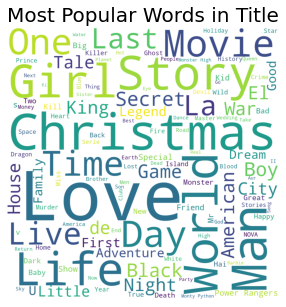

In [193]:
# Defining Wordcloud
plt.rcParams['figure.figsize'] = (5,5)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 20)
plt.show()

The most common word in Netflix titles is Love, Christmas, Story, Day and World.

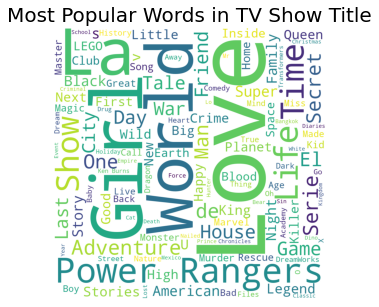

In [194]:
# Defining Wordcloud
plt.rcParams['figure.figsize'] = (5,5)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df1['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in TV Show Title',fontsize = 20)
plt.show()

The most popular words in TV Shows Title is La, Girl, Love, World, Power and Rangers.

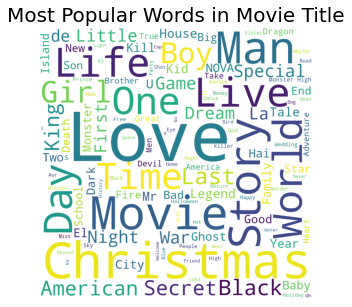

In [195]:
# Defining Wordcloud
plt.rcParams['figure.figsize'] = (5, 5)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df2['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Movie Title',fontsize = 20)
plt.show()

Most popular word in Netflix movies title are Love, Man, Christmas, Movie, Story and Day.

# Description

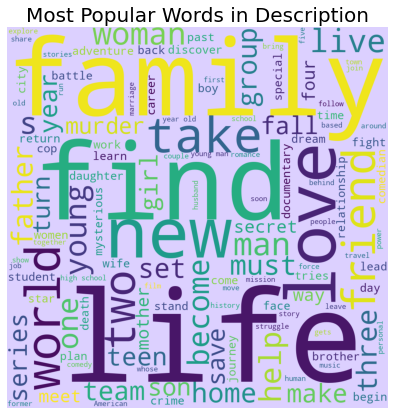

In [196]:
# Defining Wordcloud
plt.rcParams['figure.figsize'] = (7,7)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = '#DCD0FF', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Description',fontsize = 20)
plt.show()

The words used to describe netflix content are Family, life, find, new, take, and love.

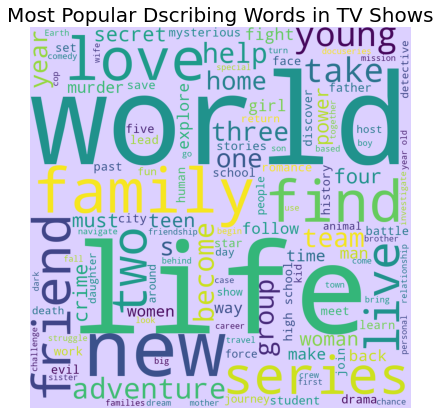

In [197]:
# Defining Wordcloud
plt.rcParams['figure.figsize'] = (7,7)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = '#DCD0FF', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df1['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Dscribing Words in TV Shows',fontsize = 20)
plt.show()

The words used to describe TV Shows are World, new, life, series, love , friend, family, two and young.

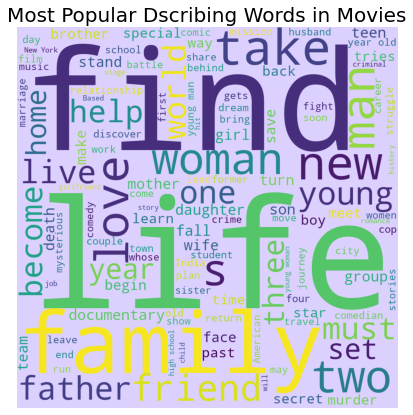

In [198]:
# Defining Wordcloud
plt.rcParams['figure.figsize'] = (7,7)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = '#DCD0FF', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df2['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Dscribing Words in Movies',fontsize = 20)
plt.show()

The words used to describe Movies are Life, two, find, love, take, young, man, family and new

# Duration

In [199]:
Show_duration = df2['duration'].value_counts()
Show_duration.head(30)

90     136
93     131
94     125
91     125
95     119
92     118
97     117
96     115
98     106
103    101
99     101
88     101
102     98
106     97
100     97
101     96
86      93
105     91
104     89
89      88
87      87
110     86
107     85
108     74
116     65
112     65
85      63
83      61
109     61
111     61
Name: duration, dtype: int64

Text(0.5, 1.0, 'Duration of Movies')

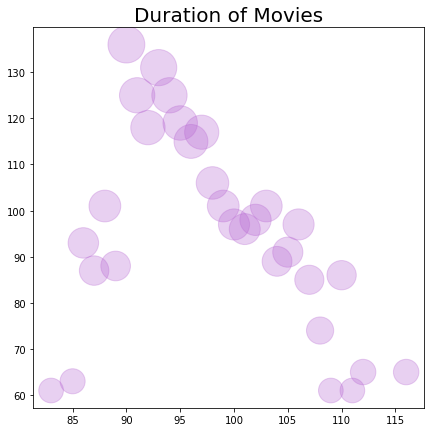

In [200]:
#plotting top 30 Observation
Duration = [90,93,94,91,95,92,97,96,98,103,99,88,102,106,100,101,86,105,104,89,87,110,107,108,112,
            116,85,111,83,109]
Count = [136,131,125,125,119,118,117,115,106,101, 101,101,98,97,97,96,93,91,89,88,87,86,85,74,65,
         65,63,61,61,61]
sizes = [1360,1310,1250,1250,1190,1180,1170,1150,1060,1010,1010,1010,980,970,970,960,930,910,890,880,
        870,860,850,740,650,650,630,610,610,610]
plt.scatter(Duration, Count,  c='#B666D2', s=sizes, alpha=0.3,
            cmap='viridis')
plt.title('Duration of Movies',fontsize = 20)

# RECOMMENDATION SYSTEM

It provides recommendations to users on what they might like based on their historical preferences.

# CONTENT BASED RECOMMENDATION SYSYTEM

It learns the profile of the new user’s interests based on the features present, in objects the user
has rated. It’s basically a keyword specific recommendation system here keywords are used to describe 
the items.

Our recommendation system will suggest users movies based on:

Director

Cast

Listed_in(Genre)

Description

Title

# Selecting the Required Features

In [201]:
features=['listed_in','director','cast','description','title']
filters = df[features]

filters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listed_in    7787 non-null   object
 1   director     7787 non-null   object
 2   cast         7787 non-null   object
 3   description  7787 non-null   object
 4   title        7787 non-null   object
dtypes: object(5)
memory usage: 304.3+ KB


# Cleaning the data to be applied to Recommendation System algorithm

In [202]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [203]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,listed_in,director,cast,description,title
0,"internationaltvshows,tvdramas,tvsci-fi&fantasy",nan,"joãomiguel,biancacomparato,michelgomes,rodolfo...",inafuturewheretheeliteinhabitanislandparadisef...,3%
1,"dramas,internationalmovies",jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19
2,"horrormovies,internationalmovies",gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59
3,"action&adventure,independentmovies,sci-fi&fantasy",shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21


In [204]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [205]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [206]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

# Calculating Cosine Similarity scores

In [207]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [208]:
filters

,listed_in,director,cast,description,title,soup
0,"internationaltvshows,tvdramas,tvsci-fi&fantasy",nan,"joãomiguel,biancacomparato,michelgomes,rodolfo...",inafuturewheretheeliteinhabitanislandparadisef...,3%,"nan joãomiguel,biancacomparato,michelgomes,rod..."
1,"dramas,internationalmovies",jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19,"jorgemichelgrau demiánbichir,héctorbonilla,osc..."
2,"horrormovies,internationalmovies",gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59,"gilbertchan teddchan,stellachung,henleyhii,law..."
3,"action&adventure,independentmovies,sci-fi&fantasy",shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9,"shaneacker elijahwood,johnc.reilly,jennifercon..."
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21,"robertluketic jimsturgess,kevinspacey,katebosw..."
...,...,...,...,...,...,...
7782,"dramas,internationalmovies",joseffares,"imadcreidi,antoinetteturk,eliasgergi,carmenleb...","whenlebanon'scivilwardepriveszozoofhisfamily,h...",zozo,"joseffares imadcreidi,antoinetteturk,eliasgerg..."
7783,"dramas,internationalmovies,music&musicals",mozezsingh,"vickykaushal,sarah-janedias,raaghavchanana,man...",ascrappybutpoorboywormshiswayintoatycoon'sdysf...,zubaan,"mozezsingh vickykaushal,sarah-janedias,raaghav..."
7784,"documentaries,internationalmovies,music&musicals",nan,nastyc,"inthisdocumentary,southafricanrappernastychits...",zulumaninjapan,"nan nastyc documentaries,internationalmovies,m..."
7785,"internationaltvshows,realitytv",nan,"adrianozumbo,rachelkhoo",dessertwizardadrianozumbolooksforthenext“willy...,zumbo'sjustdesserts,"nan adrianozumbo,rachelkhoo internationaltvsho..."


In [209]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

# Defining the recommendation system

In [210]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

# Getting Recommendations

In [211]:
get_recommendations_new('Attack on Titan', cosine_sim2)

995                                   Blue Exorcist
3853                   Magi: The Labyrinth of Magic
3472                            Kuroko's Basketball
4906                                  Pop Team Epic
947                                    Black Butler
6304    The Disastrous Life of Saiki K.: Reawakened
676                    Back Street Girls -GOKUDOLS-
3852                      Magi: Adventure of Sinbad
4657                                  One-Punch Man
6303                The Disastrous Life of Saiki K.
Name: title, dtype: object

In [212]:
get_recommendations_new('Bad Boys', cosine_sim2)

688                   Bad Boys II
3059    Iron Sky: The Coming Race
7376                   Used Goods
1002                  Blue Streak
4032              Men in Black II
2743                   Himmatwala
5393                  Sardaarji 2
6637    The Man Who Feels No Pain
7623               Wild Wild West
4031                 Men in Black
Name: title, dtype: object

In [213]:
get_recommendations_new('Rocky', cosine_sim2)

5246                Rocky II
5249                 Rocky V
5247               Rocky III
5248                Rocky IV
280                Abdo Mota
1236         Casino Tycoon 2
5907                Superfly
6186                The Bund
4300    Mutiny on the Bounty
5351                 Saladin
Name: title, dtype: object